In [14]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarms
# %pip install plotly

In [15]:
from utils import GPR, mean_squared_error, visualize, generate_sample

import numpy as np
from tqdm import tqdm
import plotly.express as px

np.random.seed(42)

In [16]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_train_data_points = 500
n_test_data_points = 10_000
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

In [17]:
X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=1)
X_test, y_test = generate_sample(n_test_data_points, n_dims, lower_bound, upper_bound, target_func)

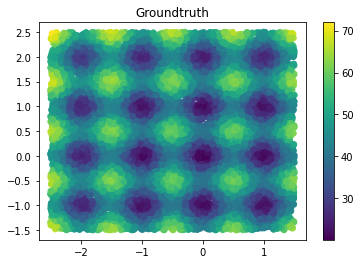

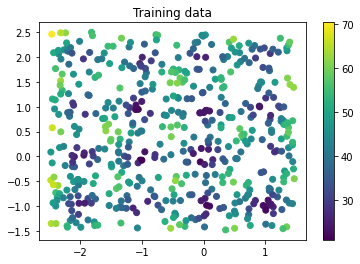

In [5]:
visualize(X_test, y_test, title='Groundtruth'), visualize(X_train, y_train, title='Training data');

In [18]:
hp = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9,
    'n_optim_steps': 10,
    'n_particles': 10,
    'n_restarts_optimizer': 10
}

gpr = GPR(**hp)

In [7]:
gpr = gpr.fit(X_train, y_train)

In [8]:
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

1.3285899392923122

In [9]:
# # dauert m 40s
# gpr = gpr.hyper_optimize(X_train, y_train)
# mean_squared_error(y_test, y_pred)

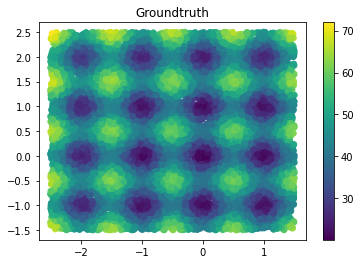

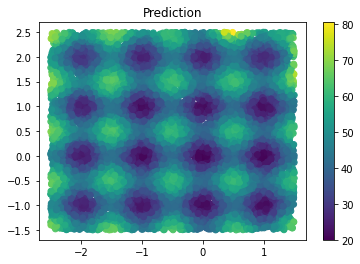

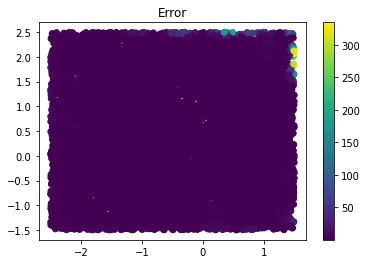

In [10]:
y_pred = gpr.predict(X_test)
# import matplotlib.pyplot as plt
# plt.subplot(3, 1, 3)
visualize(X_test, y_test, title="Groundtruth")
visualize(X_test, y_pred, title="Prediction")
visualize(X_test, (y_test-y_pred)**2, title="Error")
# plt.show()

In [11]:
mean_squared_error(y_test, y_pred)

1.3285899392923122

In [12]:
n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, 2, (-2.5, -1.5), (1.5, 2.5), target_func, noise_scale=0)
    gpr = GPR(**hp)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=n_data_points, y=errors, title='Error vs. Number of Data Points', log_y=True, trendline="lowess")

100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


In [13]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n, 2, (-2.5, -1.5), (1.5, 2.5), target_func, noise_scale=noise)
    gpr = GPR(**hp)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=noise_scales, y=errors, title='Error vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:30<00:00,  5.12s/it]


In [49]:
target_func(X_test[0])

215628.37468614118

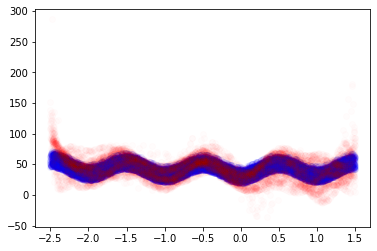

In [77]:
import matplotlib.pyplot as plt

plt.scatter(X_test[0], target_func(X_test), label="Training data", color="blue", alpha=0.05)
plt.scatter(X_test[0], y_pred, label="Prediction", color="red", alpha=0.01);